In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

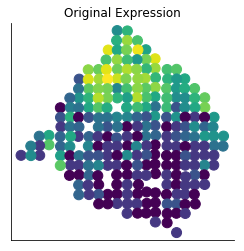

In [3]:
figsize(4, 4)
plt.scatter(sample_info.x, -sample_info.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Original Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-unshuff-example.pdf');

In [4]:
sample_info_shuffle = sample_info.copy()

In [5]:
tmp = sample_info.index.values.copy()
np.random.shuffle(tmp)
sample_info_shuffle['x'] = sample_info['x'][tmp].values
sample_info_shuffle['y'] = sample_info['y'][tmp].values

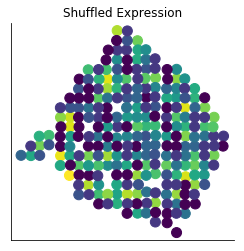

In [6]:
plt.scatter(sample_info_shuffle.x, -sample_info_shuffle.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Shuffled Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-shuff-example.pdf');

In [7]:
import NaiveDE

In [8]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info_shuffle, dfm.T, 'np.log(total_counts)').T

In [9]:
import SpatialDE

In [10]:
X = sample_info_shuffle[['x', 'y']]

In [11]:
shuffle_results = SpatialDE.run(X, res)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.099s
INFO:root:Fitting gene models
INFO:root:Model 1 of 10
 11%|█         | 1350/12856 [00:01<00:13, 861.28it/s]/Users/vale/Documents/Research projects/Ongoing/SpatialDE/Python-module/SpatialDE/base.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)
INFO:root:Model 2 of 10                               
INFO:root:Model 3 of 10                               
INFO:root:Model 4 of 10                               
INFO:root:Model 5 of 10                               
INFO:root:Model 6 of 10                               
INFO:root:Model 7 of 10                               
INFO:root:Model 8 of 10                               
INFO:root:Model 9 of 10                               
INFO:root:Model 10 of 10                              


In [12]:
shuffle_results.query('qval < 0.05').shape

(2, 18)

In [19]:
import SpatialDE.plot

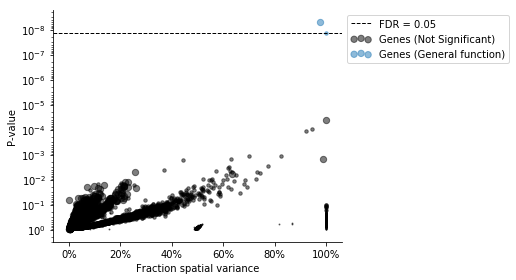

In [31]:
SpatialDE.plot.FSV_sig(shuffle_results)
plt.tight_layout()
plt.savefig('shuffled_BC_FSV_qval.pdf', bbox_inches='tight', dpi=150);

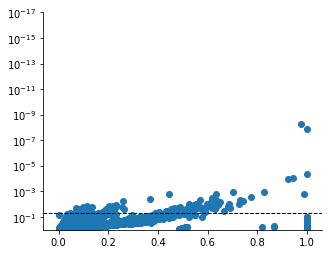

In [23]:
plt.yscale('log')
plt.scatter(shuffle_results.FSV, shuffle_results.pval);
plt.ylim(1e-17, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);

In [24]:
shuffle_results.sort_values('pval').head(10)

,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
12008,0.975494,4,CXorf36,3.125663,0.020969,-33.377651,-0.845228,1.761571,SE,250,6.752537e-05,9.005436e-02,0.001135,88.841145,-67.546377,34.168726,5.053459e-09,0.000065
9190,0.999954,4,LRRN3,0.641736,0.000045,133.041077,-1.337054,0.793393,SE,250,3.544772e-03,1.231597e+06,0.001114,-243.996311,100.760161,32.280916,1.334173e-08,0.000086
12352,0.999946,4,NTNG2,3.125663,0.000045,131.135513,0.662439,38.040916,SE,250,5.624765e-10,1.377094e-01,0.000933,-240.185181,114.391856,16.743657,4.278506e-05,0.183348
9535,0.944978,4,C5AR1,0.641736,0.057898,52.629219,-1.306675,0.757943,SE,250,6.471181e-02,1.934449e+01,0.001642,-83.172594,37.403892,15.225327,9.541516e-05,0.285472
8828,0.922119,4,GPR37L1,0.641736,0.083983,79.309615,-1.204218,0.633804,SE,250,2.906304e-02,4.741539e+00,0.001504,-136.533386,64.370330,14.939285,1.110268e-04,0.285472
8944,0.701937,4,TAF8,0.641736,0.422237,-81.855830,-1.565227,0.970496,SE,250,6.681844e-03,1.664656e-01,0.001035,185.797503,-92.493734,10.637905,1.107931e-03,0.974739
9511,0.825142,4,B3GALNT2,0.641736,0.210718,78.262058,-1.374591,0.770262,SE,250,2.077000e-02,9.665774e-01,0.001385,-134.438273,67.740735,10.521323,1.180050e-03,0.974739
12573,0.986426,4,CD1D,5.298311,0.008705,40.109823,-0.155636,2.976194,SE,250,8.532868e-05,3.547230e-01,0.001822,-58.133803,29.974584,10.135239,1.454614e-03,0.974739
9552,0.632167,4,SMOC1,0.641736,0.578583,109.994274,-1.258512,0.556730,SE,250,6.033712e-03,1.267643e-01,0.001000,-197.902705,99.921099,10.073175,1.504436e-03,0.974739
11130,0.443171,4,KLK10,1.843940,1.176056,79.454179,-1.329172,0.129497,SE,250,3.762105e-03,7.192519e-02,0.000992,-136.822515,69.485238,9.968942,1.592030e-03,0.974739


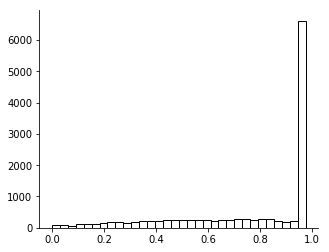

In [25]:
shuffle_results.pval.hist(bins=32, fc='w', ec='k', grid=False);

In [26]:
from scipy import stats

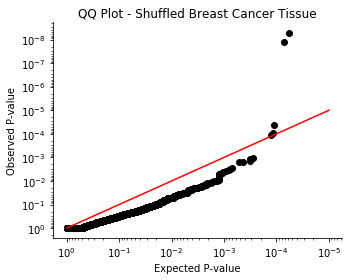

In [30]:
figsize(5, 4)

chi2_samples = pd.Series(stats.chi2.rvs(df=1, size=shuffle_results.LLR.shape[0]))
pval_samples = 1 - stats.chi2.cdf(chi2_samples.sort_values(), df=1)
pval_observed = 1 - stats.chi2.cdf(shuffle_results.LLR.sort_values(), df=1)

plt.loglog()
plt.scatter(pval_samples, pval_observed, marker='o', c='k', rasterized=True);
plt.plot([1e-5, 1], [1e-5, 1], c='r');

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('Expected P-value')
plt.ylabel('Observed P-value');

plt.title('QQ Plot - Shuffled Breast Cancer Tissue');

plt.tight_layout()
plt.savefig('shuffled_bc_qq_plot.pdf', bbox_inches='tight', dpi=150);